# Genetic Algorithm Approximation of the Dynamic Imperfect Information Model

# Importing packages

In [1]:
# genetic algorithm library
import inspyred
# mathematic library
import math
# to get randomize numbers
from random import Random
#time library
from time import time
# to work with dataframes
import pandas as pd
# to get math structures
import numpy as np
# library to draw
import matplotlib.pyplot as plt

# this code is to enable the jupyter black theme:# this code is to enable the jupyter black theme:
#from jupyterthemes import jtplot
#jtplot.style( context='notebook',grid=False, ticks =True, fscale =1)
# style

#nice graphs in jupyter:#nice graphsin jupyter:
%matplotlib notebook
%matplotlib inline


# Parameters, Variables and Methods

In [2]:
#importing our .py's files, in particular, global  constant variables. 
from src.params import limit, YH, YL, n_inputs

# importing dynamic model module (methods and variables)
import src.dynamicga as dy


In [3]:
# temporal database simulation
df_sim = pd.DataFrame([], columns = [] ) 
# temporal database hypervolumes
df_hyp = pd.DataFrame([], columns = [] ) 

#to use as seed "manual" seed
init_pop_seed_cont2 = [[0,0,0.4,0.4],
                [0,0,0.45,0.45],
                [0,0,0.5,0.5], 
                [0,0.5,0.5,0.7],
                [0.25,0.25,2,2], 
                [0.25,0.25,0.7,0.7],
                [0.5,0.5,1.5,1.5], 
                [0.1,0.1,0.8,0.8],
                [0,0,1,1], 
                [0.5,0.5,2,2],
                [2,2,2.5,2.5],
                [2,2,4,4]]  

# font style
plt.rcParams["font.family"] = "Times New Roman"

# Main and Testing

## Simple simulation

In [7]:
# params
dy.max_gen = 1000000
dy.init_pop_random =True
dy.init_pop_size = 50
dy.crossover = 0.4
dy.mutation = 0.35
dy.h = 0.5

dy.set_contract_periods(contracts=2)

# arguments from simulate
args = []

print("***************new simulation******************")
# setting variables for current simulation

# to load a previous database to seed 
previous_gen =dy.get_compensations_list( "dynamic_periods2_1000_h0.5_cro_0.8_mut_0.1_key_bdcf796")

# reset seeding
dy.reset_seeding(seeds=previous_gen)  # previous simulation
#dy.reset_seeding(seeds=init_pop_seed_cont2) # list defined in variables

# reinit database and variables
dy.reinit_variables(crra=dy.h)
# simulating with global parameters using the perfect information model
df_sim, df_hyp= dy.simulate_dynamic()
#list of cara values to simulate with current parameters



***************new simulation******************
**** Random population mode enable ****
archive params : dynamic_periods6_1000_h0.5_cro_1.0_mut_0.2_key_
******gen****** :::      0  -- ***init Pop*** 30 : ***pop size*** 4 : ***num eval*** 30 
******gen****** :::  0  ;*****HV****** :::  12.989750813756107 ;***points in database*** ::: 4
******gen****** :::     30  -- ***init Pop*** 30 : ***pop size*** 24 : ***num eval*** 930 
******gen****** :::  30  ;*****HV****** :::  18.075518460568333 ;***points in database*** ::: 28
******gen****** :::     80  -- ***init Pop*** 30 : ***pop size*** 36 : ***num eval*** 2430 
******gen****** :::  80  ;*****HV****** :::  18.931846450872786 ;***points in database*** ::: 64
******gen****** :::    150  -- ***init Pop*** 30 : ***pop size*** 46 : ***num eval*** 4530 
******gen****** :::  150  ;*****HV****** :::  19.00926620640253 ;***points in database*** ::: 110
******gen****** :::    250  -- ***init Pop*** 30 : ***pop size*** 49 : ***num eval*** 7530 
****

## By crossover and mutation

In [17]:
# Simulations per crossover and mutation

# list of crossover indexes
cross_list = [0.4,0.6,0.8,1.0]
#cross_list = [0.4,0.6]

# list of mutation indexes
muts_list = [0.01,0.05,0.1,0.15,0.2]
muts_list = [0.01,0.05]
muts_list = [0.01,0.05,0.1,0.15,0.2, 0.25, 0.30,0.35,0.40]

# assign risk averse coefficient
dy.h = 0.5

# other paramteres 
dy.init_pop_random =True
dy.max_gen = 10000
dy.init_pop_size = 50
dy.set_contract_periods(contracts=2)

# simulations per (crossover, mutation)
total_sim = 3

# arguments from simulate
args = []
         
# data frame of crossover and mutations
name_cr_mu_df = 'dynamic_perf_cross_mut_'+str(dy.max_gen)+'_periods'+str(dy.contract_len)+'_h'+str(dy.h)+'_gis_19_jul'
cols_cr_mut = ['sim','cross', 'mut', 'final_pop','hv']
db_cr_mut = pd.DataFrame([], columns = cols_cr_mut ).set_index('sim') 
print(name_cr_mu_df)
         

dynamic_perf_cross_mut_10000_periods2_h0.5_gis_19_jul


In [18]:
# loop over crossover and mutation indexes
for cr in cross_list:
    for mu in muts_list:
        for i in range(total_sim):# assigning values to global variables of crossover and mutation
            dy.crossover = cr
            dy.mutation = mu
            
            print("************************new simulation  **********************")
            print("*****","crossover: ", dy.crossover,"mutation: ",dy.mutation, "  num: ",i,"*****")
            print("***********************new simulation***********************")
            
            # setting variables for current simulation
            # reset seeding
            dy.reset_seeding(seeds= [])
            # reinit database and variables
            dy.reinit_variables(crra=dy.h)
            
            # simulate
            db_sims, df_hyp= dy.simulate_dynamic()
            
            #adding result of simulation to cross and mut data frame
            hv_ = df_hyp['indicator'].loc[max(df_hyp.index)]
            final_pop_ = len(db_sims[db_sims['gen']==dy.max_gen])
            new_row = {'sim':list(db_sims['sim'])[0], 'cross':cr, 'mut':mu, 'final_pop':final_pop_,'hv': hv_}#db_sims.index[0] if sim is index
            #append row to the dataframe
            db_cr_mut = db_cr_mut.append(new_row, ignore_index=True)
            
            # saving database of crossover and mutation
            db_cr_mut.to_csv('./data/{}.csv'.format(name_cr_mu_df))
         
         

*******
***** crossover:  1.0 mutation:  0.3   num:  0 *****
***********************new simulation***********************
**** Random population mode enable ****
archive params : dynamic_periods2_10000_h0.5_cro_1.0_mut_0.3_key_
******gen****** :::      0  -- ***init Pop*** 50 : ***pop size*** 12 : ***num eval*** 50 
******gen****** :::  0  ;*****HV****** :::  17.41205262328401 ;***points in database*** ::: 12
******gen****** :::    300  -- ***init Pop*** 50 : ***pop size*** 103 : ***num eval*** 15050 
******gen****** :::  300  ;*****HV****** :::  21.12320753780336 ;***points in database*** ::: 115
******gen****** :::    800  -- ***init Pop*** 50 : ***pop size*** 118 : ***num eval*** 40050 
******gen****** :::  800  ;*****HV****** :::  21.364244201688248 ;***points in database*** ::: 233
******gen****** :::   1500  -- ***init Pop*** 50 : ***pop size*** 159 : ***num eval*** 75050 
******gen****** :::  1500  ;*****HV****** :::  21.583275589913875 ;***points in database*** ::: 392
******ge

# Ploting

## Parameters

In [19]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook 

name_params = './data/dynamic_perf_cross_mut_10000_periods2_h0.5_gis_17_jul'
name_params2 = './data/dynamic_perf_cross_mut_10000_periods2_h0.5_gis_18_jul'
name_params3 = './data/dynamic_perf_cross_mut_10000_periods2_h0.5_gis_19_jul'
name_params4 = './data/dynamic_perf_cross_mut_10000_periods2_h0.5_itza_17_jul'
name_params5 = './data/dynamic_perf_cross_mut_10000_periods2_h0.5_itza_18_jul'
try:
    db_params = pd.read_csv('{}.csv'.format(name_params)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params))

try:
    db_params2 = pd.read_csv('{}.csv'.format(name_params2)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params2))

try:
    db_params3 = pd.read_csv('{}.csv'.format(name_params3)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params3))

try:
    db_params4 = pd.read_csv('{}.csv'.format(name_params4)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params4))

try:
    db_params5 = pd.read_csv('{}.csv'.format(name_params5)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params5))
    
db_params = pd.concat([db_params,db_params2,db_params3,db_params3,db_params4],sort = False, axis=0)    
   
# Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'sim',inplace=True)
#db_sims.set_index('sim',inplace= True)
db_params.drop(columns=['Unnamed: 0'],inplace=True)

# list of crossover indexes
cross_list = list(db_params['cross'].unique())

muts_list = list(db_params['mut'].unique())

#printing head of dataframe,checking if everything is ok
db_params

,cross,mut,final_pop,hv
sim,,,,
18ddeb86-bc95-4015-955b-eb272bc22d41,0.4,0.01,1403,20.723824
6da7f447-cf46-44f1-959a-f04aa64b1aca,0.4,0.05,967,21.002412
6dc439ba-557e-4b0c-b9dd-1bb4753bb34c,0.4,0.10,859,21.496818
5866b8a0-aa4c-49eb-9875-957d06bbbe5a,0.4,0.15,657,22.092625
f6ba63c7-71b4-46e6-b2f5-af187849d7b2,0.4,0.20,676,22.165945
...,...,...,...,...
02b7a460-e73e-47a7-9f4b-76f215864206,1.0,0.30,348,21.862783
8e027be7-c879-415b-98fe-870d9aa40f86,1.0,0.35,373,22.204302
71950b19-1f86-4f82-b4dd-106b3aa8c6d0,1.0,0.35,392,22.058415


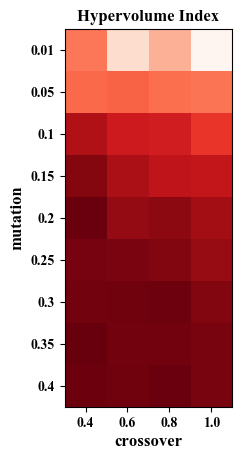

In [22]:
# hypervolume

%matplotlib inline

weight = 4
height = 5
density = 100

plt.figure(figsize=(weight, height), dpi=density)


matrix_pos =[[(str(cr)+" "+str(mu)) for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]
maxim_hv = max(db_params['hv'])
matrix =[[maxim_hv-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['hv'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Reds_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Hypervolume Index')

plt.gcf().subplots_adjust(left=0.18)

plt.savefig("./reports/hv_comparison_per_10000_h50_cross_mut.pdf")
# print(matrix)
# print(matrix_pos)

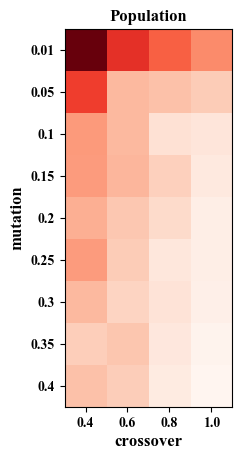

In [23]:
#population

plt.figure(figsize=(weight, height), dpi=density)

maxim_pop = max(db_params['final_pop'])
matrix =[[maxim_hv-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['final_pop'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Reds_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Population')

plt.gcf().subplots_adjust(left=0.18)
plt.savefig("./reports/pop_comparison_per_10000_h50_cross_mut.pdf")
# print(matrix)
# print(matrix_pos)

In [40]:
db_sum = db_params.groupby(['cross', 'mut']).mean()
db_sum.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (0.4, 0.01) to (1.0, 0.4)
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   final_pop  36 non-null     float64
 1   hv         36 non-null     float64
dtypes: float64(2)
memory usage: 858.0 bytes


In [35]:
print("Params with maximum avg Hypervolume :")
db_sum[db_sum['hv']==max(db_sum['hv'])]

Params with maximum avg Hypervolume :


,,final_pop,hv
cross,mut,,
0.4,0.35,604.909091,22.211419


In [36]:
print("Params with minimum avg Hypervolume:")
db_sum[db_sum['hv']==min(db_sum['hv'])]

Params with minimum avg Hypervolume:


,,final_pop,hv
cross,mut,,
1.0,0.01,899.272727,19.1136


In [34]:
print("Params with maximum avg final population :")
db_sum[db_sum['final_pop']==max(db_sum['final_pop'])]

Params with maximum avg final population :


,,final_pop,hv
cross,mut,,
0.4,0.01,1741.363636,20.539839


In [33]:
print("Params with minimum avg final population :")
db_sum[db_sum['final_pop']==min(db_sum['final_pop'])]

Params with minimum avg final population 


,,final_pop,hv
cross,mut,,
1.0,0.4,346.0,22.090969


In [17]:
## Specific simulation

### Loading Data Base

In [9]:
arch_name = 'dynamic_periods2_2000_h0.5_cro_0.8_mut_0.1_key_1761038'
arch_name = 'dynamic_periods2_1000_h0.5_cro_0.8_mut_0.1_key_6bd2959'
arch_name = 'dynamic_periods4_1000_h0.5_cro_1.0_mut_0.2_key_8c22197' # 4 periods
arch_name = 'dynamic_periods6_1000_h0.5_cro_1.0_mut_0.2_key_2f81a2c'

df = dy.load_data(arch_name)
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,sim,u_principal,u_agent,gen,w_l_6,w_l_5,w_l_4,w_l_3,w_l_2,w_l_1,w_h_6,w_h_5,w_h_4,w_h_3,w_h_2,w_h_1
0,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,3.040796,2.790390,0,0.592968,0.303322,0.373251,0.090331,1.613306,0.286828,1.967570,0.314028,2.526570,2.701966,1.677375,1.980667
1,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,2.660005,3.886293,0,0.656878,0.368578,0.675479,0.624272,1.248898,0.821074,2.495788,0.932379,2.215148,1.312384,2.098748,2.216710
2,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,3.954049,1.615632,0,0.866452,0.079117,0.384173,1.160176,0.182626,0.094915,3.546258,1.340707,3.511470,3.290832,2.862608,1.030795
3,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,2.911992,3.243412,0,0.523461,0.666853,1.918007,0.461275,1.352933,0.296788,2.981755,2.084764,1.990872,2.545308,1.877079,2.766457
4,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,2.104543,4.325978,30,0.634578,0.000000,0.347724,0.623215,1.334226,0.734211,3.304288,0.927497,1.259663,0.955981,2.784449,2.945293


In [10]:
df_int, args = dy.get_extended_dataframe(df, arch_name)
U_periods, V_periods, w_L_periods, w_H_periods,va_periods, U_low, U_high, V_low, V_high, contract_len = args[0], args[1], args[2], args[3],args[4],args[5], args[6], args[7], args[8], args[9]

df_int.head()

The dataframe has  6  periods


,sim,u_principal,u_agent,gen,w_l_6,w_l_5,w_l_4,w_l_3,w_l_2,w_l_1,...,v_5,u_5,v_4,u_4,v_3,u_3,v_2,u_2,v_1,u_1
518,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,0.745703,5.155956,1000,0.381015,1.156468,0.325284,1.623108,2.000000,0.715654,...,3.431780,3.004983,3.289958,2.632657,3.102405,2.621277,4.458242,0.802334,5.155956,0.745703
461,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,1.318600,5.078964,1000,1.443154,0.605785,0.225234,1.836151,1.172592,2.000000,...,4.145403,2.099239,2.285507,3.874042,2.860019,2.850812,4.175469,1.126768,5.078964,1.318600
459,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,1.352547,4.931609,1000,1.459128,0.858387,0.319526,2.000000,1.193001,1.787732,...,4.279519,1.973414,3.009103,3.117570,3.438679,2.187247,4.037390,1.228167,4.931609,1.352547
445,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,1.534368,4.829779,1000,0.000000,0.000000,1.096690,1.577189,1.856495,0.834215,...,2.279845,2.541608,1.962224,2.878584,3.648428,1.625823,4.349453,0.897039,4.829779,1.534368
460,2f81a2cb-2775-4eb6-9096-19d01cdd3a26,1.547618,4.777807,1000,1.405310,0.245523,0.423288,1.991367,1.217541,1.555701,...,2.945008,2.851903,2.203122,4.052029,3.934095,2.046949,4.088433,1.263654,4.777807,1.547618


## Pareto Frontier

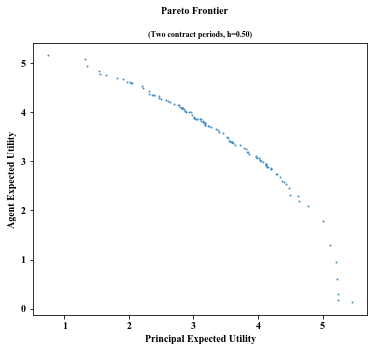

<Figure size 432x288 with 0 Axes>

In [11]:
#PLOTING Frontier
colors = ['#08306b',
          '#08519c',
          '#2171b5',
          '#4292c6',
          '#6baed6',
          '#9ecae1',
          '#c6dbef',
          '#deebf7',
          '#f7fbff']
    
plt.figure(figsize= (6,5))

plt.scatter(U_periods[contract_len-1], V_periods[contract_len-1],
            color=colors[3],
            s=1.0,
            alpha=1)
plt.xlabel("Principal Expected Utility")
plt.ylabel("Agent Expected Utility")

plt.suptitle('Pareto Frontier', fontsize=10)
plt.title('(Two contract periods, h=0.50)',fontsize=8)

plt.show()

plt.savefig('./reports/Pareto_'+arch_name+'.pdf')

## Compensation Scheme

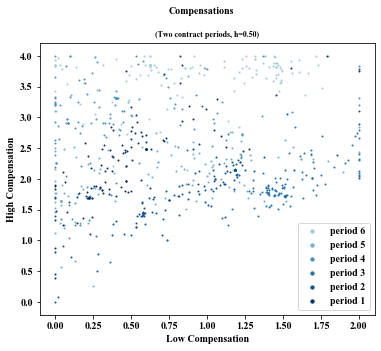

<Figure size 432x288 with 0 Axes>

In [12]:
 #PLOTING compensations by period
colors = ['#08306b',
          '#08519c',
          '#2171b5',
          '#4292c6',
          '#6baed6',
          '#9ecae1',
          '#c6dbef',
          '#deebf7',
          '#f7fbff']
bicolors = ['#3182bd',
            '#9ecae1']


plt.figure(figsize= (6,5))
for i in range(contract_len):
    lab = 'period '+str(contract_len-i)
    plt.scatter(w_L_periods[i],w_H_periods[i],
                color = colors[contract_len-i-1],
                s = 1.0,
                alpha = 1,
                label = lab)
plt.legend( markerscale=3.3, scatterpoints=1)#, fontsize=10)
plt.ylabel("High Compensation")
plt.xlabel("Low Compensation")

plt.suptitle('Compensations', fontsize=10)
plt.title('(Two contract periods, h=0.50)',fontsize=8)

plt.show()

plt.savefig('./reports/Compensation_'+arch_name+'.pdf')

## Compensation by periods over points

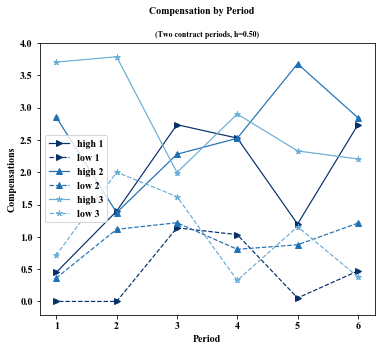

<Figure size 432x288 with 0 Axes>

In [13]:
#PLOTING compensations by points
#painting $list_points$
indiv_count = len(w_H_periods[0])
periods = [int(contract_len-k) for k in range(contract_len)]
marks = [">", '^', (5,2), '+', (5,0)]#, (5,1)]

list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

color = ['#08306b',
          #'#08519c',
          '#2171b5',
          #'#4292c6',
          '#6baed6',
          #'#9ecae1',
          '#c6dbef',
          #'#deebf7',
          '#f7fbff']
plt.figure(figsize= (6,5))

for j in range(len(list_points)):
    points_l=[w_L_periods[i][list_points[j]] for i in range(contract_len)]
    points_h=[w_H_periods[i][list_points[j]] for i in range(contract_len)]
    
    
    plt.plot(periods, points_h,
             color = color[j],
             marker= marks[j],
             lw =1.2,
             alpha=1, 
             label = ('high ' + str(j+1)))
    plt.scatter(periods, points_h,
                color = color[j],
                s = 8.0,
                alpha = 1)
    
    plt.plot(periods, points_l,
             color = color[j],
             marker= marks[j],
             linestyle='dashed',
             lw = 1.2, 
             alpha=1, 
             label = ('low ' + str(j+1)))
    plt.scatter(periods, points_l,
                color = color[j],
                s = 8.0,
                alpha = 1)
plt.xticks(periods)
plt.legend( markerscale=1.0, scatterpoints=1, fontsize=10,  loc='best')
plt.ylabel("Compensations")
plt.xlabel("Period")

plt.suptitle('Compensation by Period', fontsize=10)
plt.title('(Two contract periods, h=0.50)',fontsize=8)

plt.show()

plt.savefig('./reports/CompensationByPeriod'+arch_name+'.pdf')

## Efforts

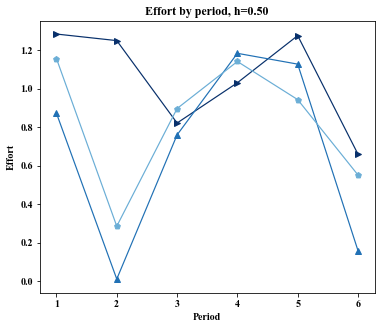

<Figure size 432x288 with 0 Axes>

In [14]:
 #PLOTING compensations by period #still working on this NOT CORRECT!!!
#painting $list_points$
list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

marks = [">", '^', (5,0), '+', (5,2)]#, (5,1)]
color = ['#08306b',
          #'#08519c',
          '#2171b5',
          #'#4292c6',
          '#6baed6',
          #'#9ecae1',
          '#c6dbef',
          #'#deebf7',
          '#f7fbff']

plt.figure(figsize= (6,5))
for j in range(len(list_points)):
    points_a = [va_periods[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods,points_a,
             color=color[j],
             marker= marks[j],
             lw = 1.2,
             #s = 8.0,
             alpha=1)
    plt.scatter(periods, points_a,
                color = color[j],
                marker= marks[j],
                s = 8.0,
                alpha = 1)
    
plt.xticks(periods)
#plt.legend( markerscale=3.3, scatterpoints=1)#, fontsize=10)
plt.xlabel("Period")
plt.ylabel("Effort")
plt.title('Effort by period, h=0.50')

plt.show()

plt.savefig('./reports/EffortbyPeriod'+arch_name+'.pdf')

## VH &  VL  trayectories

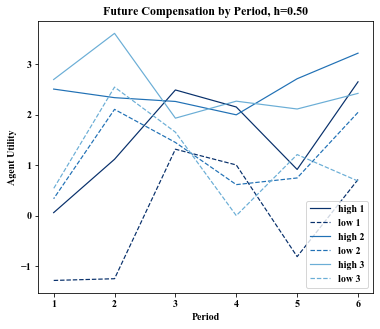

<Figure size 432x288 with 0 Axes>

In [15]:
 #PLOTING UTILITIES High and Low by period
list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

periods = [int(contract_len-k) for k in range(contract_len)]

marks = [">", '^', (5,0), '+', (5,2)]#, (5,1)]
color = ['#08306b',
          #'#08519c',
          '#2171b5',
          #'#4292c6',
          '#6baed6',
          #'#9ecae1',
          '#c6dbef',
          #'#deebf7',
          '#f7fbff']

plt.figure(figsize= (6,5))

for j in range(len(list_points)):
    points_l = [V_low[i][list_points[j]] for i in range(contract_len)]
    points_h = [V_high[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods, points_h,
             color = color[j],
             lw = 1.2,
             alpha = 1, 
             label = ('high ' + str(j+1)))
    plt.plot(periods,points_l,
             color = color[j],
             lw = 1.2,             
             linestyle='dashed',
             alpha = 1, 
             label = ('low ' + str(j+1)))
   
plt.xticks(periods)
plt.legend( markerscale=3.3, scatterpoints=1)#, fontsize=10)
plt.ylabel("Agent Utility")
plt.xlabel("Period")
plt.title('Future Compensation by Period, h=0.50')

plt.show()

plt.savefig('./reports/FutureCompensation_'+arch_name+'.pdf')

## Ploting Resumen

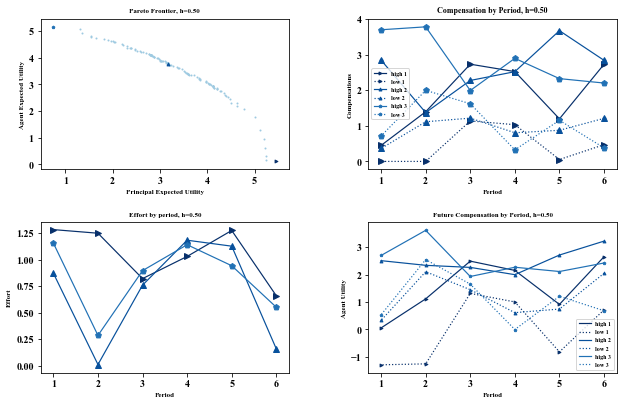

In [16]:
marks = [">", '^', (5,0), '+', (5,1)]
color = ['#08306b','#08519c', '#2171b5','#6baed6','#9ecae1','#c6dbef','#f7fbff']
bicolors = ['#3182bd','#9ecae1']

periods = [int(contract_len-k) for k in range(contract_len)]
list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(U_periods[contract_len-1], V_periods[contract_len-1],
            color=colors[5],
            s = 1.0)
plt.xlabel("Principal Expected Utility", fontsize=7)
plt.ylabel("Agent Expected Utility", fontsize=7)
plt.title('Pareto Frontier, h=0.50', fontsize=7)

for j in range(len(list_points)):
    plt.scatter(U_periods[contract_len-1][list_points[j]],
                V_periods[contract_len-1][list_points[j]],
                color = color[j],
                marker= marks[j],
                s = 8.0)

plt.subplot(222)

for j in range(len(list_points)):
    points_l=[w_L_periods[i][list_points[j]] for i in range(contract_len)]
    points_h=[w_H_periods[i][list_points[j]] for i in range(contract_len)]
    
    plt.plot(periods, points_h,
             color = color[j],
             marker= marks[j],
             lw = 1.2, 
             label = ('high ' + str(j+1)))
    plt.scatter(periods, points_h,
                color = color[j],
                s = 8.0)
    
    plt.plot(periods, points_l,
             color = color[j],
             marker= marks[j],
             linestyle='dotted',
             lw = 1.2, 
             label = ('low ' + str(j+1)))
    plt.scatter(periods, points_l,
                color = color[j],
                s = 8.0)
plt.xticks(periods)
plt.legend( markerscale = 0.5, scatterpoints = 1, fontsize=6,  loc='best')
plt.ylabel("Compensations", fontsize = 7)
plt.xlabel("Period", fontsize = 7)
plt.title('Compensation by Period, h=0.50', fontsize = 8)

plt.subplot(223)

for j in range(len(list_points)):
    points_a = [va_periods[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods,points_a,
             color = color[j],
             marker = marks[j],
             lw = 1.2)
    plt.scatter(periods, points_a,
                color = color[j],
                marker = marks[j],
                s = 8.0)
plt.xticks(periods)
plt.xlabel("Period", fontsize=7)
plt.ylabel("Effort", fontsize=7)
plt.title('Effort by period, h=0.50', fontsize=7)

plt.subplot(224)
for j in range(len(list_points)):
    points_l = [V_low[i][list_points[j]] for i in range(contract_len)]
    points_h = [V_high[i][list_points[j]] for i in range(contract_len)]
    
    plt.plot(periods, points_h,
             color = color[j],
             lw = 1.2,
             label = ('high ' + str(j+1)))
    
    plt.scatter(periods, points_h,
                color = color[j],
                marker= marks[j],
                s = 8.0,
                alpha = 1)
    
    plt.plot(periods, points_l,
             color = color[j],
             lw = 1.2,             
             linestyle='dotted',
             alpha = 1, 
             label = ('low ' + str(j+1)))
    
    plt.scatter(periods, points_l,
                color = color[j],
                marker = marks[j],
                s = 8.0)
plt.xticks(periods)
plt.legend( markerscale = 0.5, scatterpoints = 1, fontsize=6,  loc='best')
plt.ylabel("Agent Utility", fontsize=7)
plt.xlabel("Period", fontsize=7)
plt.title('Future Compensation by Period, h=0.50', fontsize=7)


#plt.title('(Two contract periods)',fontsize=8)
plt.subplots_adjust(bottom=0.1, 
                    right=0.9,
                    left = 0.1, 
                    top=0.92,
                    wspace = 0.32,
                    hspace =0.35)

plt.savefig('./reports/Resumen_'+arch_name+'.pdf')

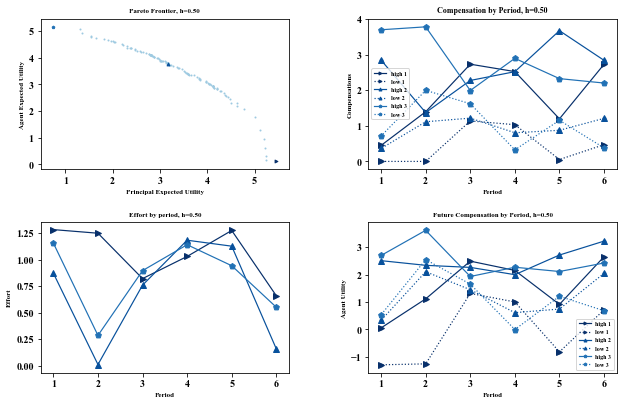

In [17]:
color_h = ['#08519c','#a50f15','#006d2c','#54278f','#a63603']
color_m = ['#3182bd','#de2d26','#31a354','#756bb1','#e6550d']
color_l = ['#6baed6','#fb6a4a','#74c476','#9e9ac8','#fd8d3c']

periods = [int(contract_len-k) for k in range(contract_len)]

list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

marks = [">", '^', (5,0), '+', (5,1)]#, (5,1)]

color = ['#08306b',
          '#08519c',
          '#2171b5',
          #'#4292c6',
          '#6baed6',
          '#9ecae1',
          '#c6dbef',
          #'#deebf7',
          '#f7fbff']

bicolors = ['#3182bd',
            '#9ecae1']

plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(U_periods[contract_len-1], V_periods[contract_len-1],
            color=colors[5],
            s = 1.0)
plt.xlabel("Principal Expected Utility", fontsize=7)
plt.ylabel("Agent Expected Utility", fontsize=7)
plt.title('Pareto Frontier, h=0.50', fontsize=7)

for j in range(len(list_points)):
    plt.scatter(U_periods[contract_len-1][list_points[j]],
                V_periods[contract_len-1][list_points[j]],
                color = color[j],
                marker= marks[j],
                s = 8.0)

plt.subplot(222)

for j in range(len(list_points)):
    points_l=[w_L_periods[i][list_points[j]] for i in range(contract_len)]
    points_h=[w_H_periods[i][list_points[j]] for i in range(contract_len)]
    
    plt.plot(periods, points_h,
             color = color[j],
             marker= marks[j],
             lw = 1.2, 
             label = ('high ' + str(j+1)))
    plt.scatter(periods, points_h,
                color = color[j],
                s = 8.0)
    plt.plot(periods, points_l,
             color = color[j],
             marker= marks[j],
             linestyle='dotted',
             lw = 1.2, 
             label = ('low ' + str(j+1)))
    plt.scatter(periods, points_l,
                color = color[j],
                s = 8.0)
plt.xticks(periods)
plt.legend( markerscale = 0.5, scatterpoints = 1, fontsize=6,  loc='best')
plt.ylabel("Compensations", fontsize = 7)
plt.xlabel("Period", fontsize = 7)
plt.title('Compensation by Period, h=0.50', fontsize = 8)

plt.subplot(223)

for j in range(len(list_points)):
    points_a = [va_periods[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods,points_a,
             color = color[j],
             marker = marks[j],
             lw = 1.2)
    plt.scatter(periods, points_a,
                color = color[j],
                marker = marks[j],
                s = 8.0)
plt.xticks(periods)
plt.xlabel("Period", fontsize=7)
plt.ylabel("Effort", fontsize=7)
plt.title('Effort by period, h=0.50', fontsize=7)

plt.subplot(224)
for j in range(len(list_points)):
    points_l = [V_low[i][list_points[j]] for i in range(contract_len)]
    points_h = [V_high[i][list_points[j]] for i in range(contract_len)]
    
    plt.plot(periods, points_h,
             color = color[j],
             marker= marks[j],
             lw = 1.2, 
             label = ('high ' + str(j+1)))
    plt.scatter(periods, points_h,
                color = color[j],
                s = 8.0)
    plt.plot(periods, points_l,
             color = color[j],
             marker= marks[j],
             linestyle='dotted',
             lw = 1.2, 
             label = ('low ' + str(j+1)))
    plt.scatter(periods, points_l,
                color = color[j],
                s = 8.0)
    
plt.xticks(periods)
plt.legend( markerscale = 0.5, scatterpoints = 1, fontsize=6,  loc='best')
plt.ylabel("Agent Utility", fontsize=7)
plt.xlabel("Period", fontsize=7)
plt.title('Future Compensation by Period, h=0.50', fontsize=7)

plt.subplots_adjust(bottom=0.1, 
                    right=0.9,
                    left = 0.1, 
                    top=0.92,
                    wspace = 0.32,
                    hspace =0.35)

plt.savefig('./reports/Resumen_'+arch_name+'.pdf')

## Pareto Fronts by periods

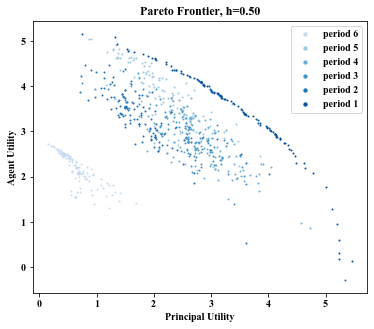

In [18]:
 #PLOTING UTILITIES by period
bicolors = ['#11629d',
            '#9ecae1']
plt.figure(figsize= (6,5))
for i in range(contract_len):
    lab = 'period '+str(contract_len-i)
    plt.scatter(U_periods[i],V_periods[i] ,
                color=colors[contract_len-i],
                s=1.0,
                alpha=1,
                label = lab)
plt.legend( markerscale=3.3, scatterpoints=1)
plt.xlabel("Principal Utility")
plt.ylabel("Agent Utility")
plt.title('Pareto Frontier, h=0.50')

plt.savefig('./reports/DynamicFrontiers_'+arch_name+'.pdf')

## Ploting Diferencias

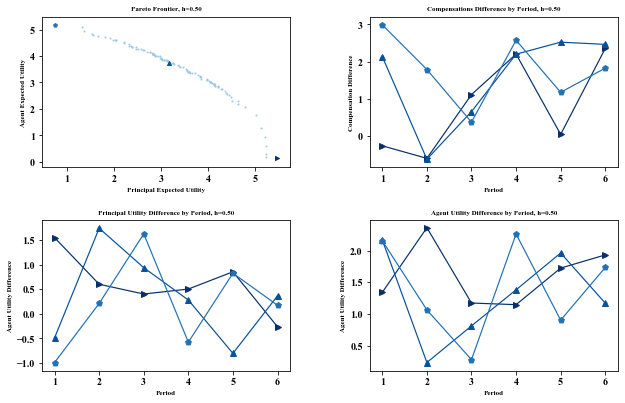

In [19]:
plt.rcParams["font.family"] = "Times New Roman"

%matplotlib inline

marks = [">", '^', (5,0), '+', (5,1)]
color = ['#08306b','#08519c', '#2171b5','#6baed6','#9ecae1','#c6dbef','#f7fbff']
bicolors = ['#3182bd','#9ecae1']

periods = [int(contract_len-k) for k in range(contract_len)]
list_points = [int(indiv_count)-1,
               #int(0.75*indiv_count),
               int(0.5*indiv_count),
               #int(0.25*indiv_count),
               int(0*indiv_count)]

periods = [int(contract_len-k) for k in range(contract_len)]
indiv_count = len(w_H_periods[0])

plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(U_periods[contract_len-1], V_periods[contract_len-1],
            color=colors[5],
            s = 1.0)
plt.xlabel("Principal Expected Utility", fontsize=7)
plt.ylabel("Agent Expected Utility", fontsize=7)
plt.title('Pareto Frontier, h=0.50', fontsize=7)

for j in range(len(list_points)):
    plt.scatter(U_periods[contract_len-1][list_points[j]],
                V_periods[contract_len-1][list_points[j]],
                color = color[j],
                marker= marks[j],
                s = 16.0)
  
plt.subplot(222)
for j in range(len(list_points)):
    points_ = [w_H_periods[i][list_points[j]]-w_L_periods[i][list_points[2]] for i in range(contract_len)]
    plt.plot(periods, points_,
             color = color[j],
             marker= marks[j],
             lw = 1.2)
    plt.scatter(periods, points_,
                color = color[j],
                s = 8.0)
plt.xticks(periods)
plt.ylabel("Compensation Difference", fontsize=7)
plt.xlabel("Period", fontsize=7)
plt.title('Compensations Difference by Period, h=0.50', fontsize=7)

plt.subplot(223)

for j in range(len(list_points)):
    points_ = [U_high[i][list_points[j]]-U_low[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods, points_,
             color = color[j],
             marker= marks[j],
             lw = 1.2)
    plt.scatter(periods, points_,
                color = color[j],
                s = 8.0)
plt.xticks(periods)
plt.ylabel("Agent Utility Difference", fontsize=7)
plt.xlabel("Period", fontsize=7)
plt.title('Principal Utility Difference by Period, h=0.50', fontsize=7)

plt.subplot(224)

for j in range(len(list_points)):
    points_ = [V_high[i][list_points[j]]-V_low[i][list_points[j]] for i in range(contract_len)]
    plt.plot(periods, points_,
             color = color[j],
             marker= marks[j],
             lw = 1.2)
    plt.scatter(periods, points_,
                color = color[j],
                s = 8.0)
plt.xticks(periods)
plt.ylabel("Agent Utility Difference", fontsize=7)
plt.xlabel("Period", fontsize=7)
plt.title('Agent Utility Difference by Period, h=0.50', fontsize=7)

plt.subplots_adjust(bottom=0.1, 
                    right=0.9,
                    left = 0.1, 
                    top=0.92,
                    wspace = 0.32,
                    hspace =0.35)

plt.savefig('./reports/SecondResumen_'+arch_name+'.pdf')

## Convergence

""


[0, 30, 80, 150, 250, 450, 650, 850, 1000]


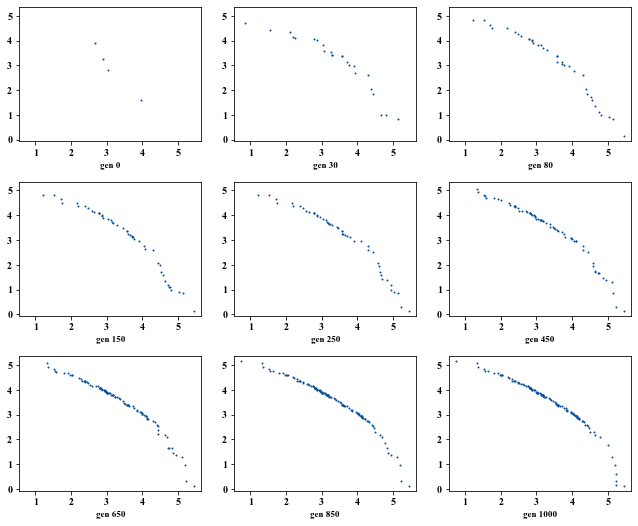

In [20]:
#Data from Genetic Algorithm Simulation
db_sims=  df
space= 0.2
cutoffs =list(db_sims['gen'].unique())

color = ['#08306b',
          '#08519c',
          '#2171b5',
          #'#4292c6',
          '#6baed6',
          '#9ecae1',
          '#c6dbef',
          #'#deebf7',
          '#f7fbff']

max_gen_ = max(cutoffs)
indiv_count_ = len(db_sims[(db_sims['gen']==max_gen_)])
u_prin_lims = (min(list(db_sims[(db_sims['gen']==max_gen_)]['u_principal']))-space,
                max(list(db_sims[(db_sims['gen']==max_gen_)]['u_principal']))+space)
u_agent_lims = (min(list(db_sims[(db_sims['gen']==max_gen_)]['u_agent']))-space, 
                max(list(db_sims[(db_sims['gen']==max_gen_)]['u_agent']))+space)
               

plt.figure(figsize=(10, 8))
cutoffs =list(db_sims['gen'].unique())
print(cutoffs)
# in case we want to plot less cuts
#cutoffs.pop(4)
#cutoffs.pop(8)

crra=0.5
count =1
for cut in cutoffs:
    plt.subplot(3,3,count)
    U_ga_temp = db_sims[(db_sims['gen']==cut)]['u_principal']
    V_ga_temp = db_sims[(db_sims['gen']==cut)]['u_agent']
    plt.scatter(U_ga_temp, V_ga_temp, color =color[1], s=1.0, alpha=1)
    label = "gen "+str(cut)
    plt.xlabel(label,fontsize = 9)
    count=count+1
    plt.xlim(u_prin_lims)
    plt.ylim(u_agent_lims)
    #plt.ylabel("Agent Utility",fontsize=10)
#changing space between plots
plt.subplots_adjust(bottom=0.08, 
                    right=0.93,
                    left =0.08,
                    top=0.92,
                    wspace = 0.18,
                    hspace = 0.3)

plt.savefig('./reports/convergence_3x3_'+arch_name+'.pdf')

plt.show()

### Hypervolume

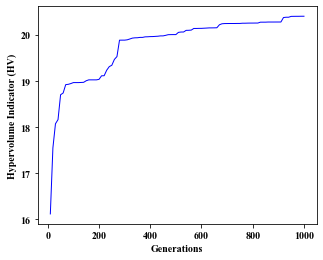

In [21]:
#Retrieving from database
#name = 'hv_dynamic_cuts_TwoPeriods_beta90'
name = arch_name
name = 'hv_{}'.format(name)

try:
    df_hv = pd.read_csv('./data/{}.csv'.format(name))
except:
    print("Impossible to retrieve {}.cvc".format(name))

#print(df_hv.head())

hypervolume_ind =df_hv['indicator']
generations_hv =df_hv['gen']
#Hypervolume Indicator
plt.figure(figsize=(5, 4))
plt.plot(generations_hv[1:],hypervolume_ind[1:], color ='blue', lw=1.0, alpha=1)#,label='risk aversion=0.5')
plt.xlabel("Generations",fontsize=10)
plt.ylabel("Hypervolume Indicator (HV)",fontsize=10)
#plt.title('Hypervolume Test, h=0.50')
#plt.legend()
plt.savefig('./reports/HV_h50'+arch_name+'.pdf')